<a href="https://colab.research.google.com/github/SJTUGavinLiu/Documents/blob/master/DrHichemBarki_KTPChallengeNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook Dr. Hichem Barki - Connect Childcare – KTP Challenge
---
## Instructions
- The purpose of this challenge is for us to get an idea about your **coding proficiency**, **attention to detail**, and ability to **use machine learning/statistical techniques** to develop and analyse sound models.** 

## Problem scenario
- The London mayor has requested that you analyse data sets related to the population of the city to make conclusions about life expectancies. Five data sets are provided consisting of different information about London’s population. Each entry has an ID. The files need to be merged into a single file containing all columns before the processing can take place.

## Task
1. Task 1: Link the data in the attached excel files together to produce a complete dataset, which include all the variables listed above. The merged file should be saved as a csv file. The program should do any necessary data cleaning and error checking. 
2. Task 2: Analyse if demographic, environmental and socioeconomic variables have an impact on health. We leave it up to you to define “health”. Use a mix of both visual and statistical analysis. 
3. Task 3: Build a model to predict life expectancy. Validate your model and compare its performance against a naïve baseline model. Again, use a mix of visual and statistical methods for the performance analysis.

## Evaluation
- We will evaluate the submission based on code, extensibility, performance, readability, correctness and integrity of the merged files. Notes and observations must be submitted along with the output files along with instructions and any dependencies that will be required to run the software (version of Python as an example is very important.) Any potential errors should be handled in the code. Feel free to use a programming language of your choice. 

## Submission
- Send the source code with the output files via email with any notes/observations (if any) on the program/problem; use ppt slides or word for the notes. Send your submission to Richard Allmendinger (richard.allmendinger@manchester.ac.uk) on or before the 7th of August 2019. We will be discussing the task and your findings at the interview.




# Package importing and version check
- This notebook shall be run in **Python 3**
- **Dependencies** include: **NumPy, pandas, scikit-learn, TensorFlow, Keras, matplotlib, and seaborn**
- Please check the next cell for **package versions** used to run the code, **although older versino might work due to backward comatibility**
- If a dependency is missing one can easily use pip or conda to install it directly from the notebook (e.g., pip install -U scikit-learn
)


In [0]:
# Module import
import os
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

print('NumPy version ', np.__version__)
print('pandas version ', pd.__version__)
print('scikit-learn version ', sklearn.__version__)
print('TensorFlow version ', tf.__version__)
print('Keras version ', keras.__version__)
print('matplotlib version ', mpl.__version__)
print('seaborn version ', sklearn.__version__)

NumPy version  1.16.4
pandas version  0.24.2
scikit-learn version  0.21.3
TensorFlow version  1.14.0
Keras version  2.2.4-tf
matplotlib version  3.0.3
seaborn version  0.21.3


In [0]:
# To suppress some deprecation warnings in sklearn
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


# Task 1 - Data pre-processing
- Link the data in the attached excel files together to produce a complete dataset, which include all the variables listed above. The merged file should be saved as a csv file. The program should do any necessary data cleaning and error checking.

In [0]:
# Download and unzip/organize data

#import urllib.request
# archive_name = 'KTP_Challenge.zip'
# sharing_get_shared_link_file(url='https://www.dropbox.com/s/cegy8d7btoh7ejr/KTP_Challenge.zip?dl=0', path='.')

# print('Beginning file download with urllib2...')
# url = 'https://www.dropbox.com/s/cegy8d7btoh7ejr/KTP_Challenge.zip?dl=0'
# urllib.request.urlretrieve(url, './KTP_Challenge.zip')

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('Uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving KTP_Challenge.zip to KTP_Challenge.zip
Uploaded file "KTP_Challenge.zip" with length 61712 bytes


In [0]:
# Unzip
dest_dir = '.'
archive_name = list(uploaded.keys())[0]

if not os.path.isdir(dest_dir):
  os.makedirs(dest_dir)
# !mkdir $dest_dir
!unzip -d $dest_dir  $archive_name

Archive:  KTP_Challenge.zip
   creating: ./KTP_Challenge/
  inflating: ./KTP_Challenge/.DS_Store  
   creating: ./__MACOSX/
   creating: ./__MACOSX/KTP_Challenge/
  inflating: ./__MACOSX/KTP_Challenge/._.DS_Store  
  inflating: ./KTP_Challenge/ConnectChildcare_KTPChallenge.docx  
  inflating: ./__MACOSX/KTP_Challenge/._ConnectChildcare_KTPChallenge.docx  
  inflating: ./KTP_Challenge/London District codes.csv  
  inflating: ./__MACOSX/KTP_Challenge/._London District codes.csv  
  inflating: ./KTP_Challenge/London ward data demographics.csv  
  inflating: ./__MACOSX/KTP_Challenge/._London ward data demographics.csv  
  inflating: ./KTP_Challenge/London ward data environment.csv  
  inflating: ./__MACOSX/KTP_Challenge/._London ward data environment.csv  
  inflating: ./KTP_Challenge/London ward data health.csv  
  inflating: ./__MACOSX/KTP_Challenge/._London ward data health.csv  
  inflating: ./KTP_Challenge/London ward data socioeconomic.csv  
  inflating: ./__MACOSX/KTP_Challenge/._Lo

## Data loading and cleaning (pre-processing)
- Loading data from disk
- Checking data types and missing data
- Pre-processing data (data imputation) for next stage (data joining)


In [0]:
# Load data into frames by also converting all columns to float
# except District, DistricCode, Wardname and Wardcode
# and stripping white spaces where necessary
data_dir = 'KTP_Challenge'

df_district = pd.read_csv(os.path.join(data_dir, 'London District codes.csv'),
                         converters={
                             'Districtcode': lambda x: x.strip()
                         })

df_demogr = pd.read_csv(os.path.join(data_dir,'London ward data demographics.csv'),
                        converters={
                            'Children': lambda x: pd.to_numeric(x, errors='coerce'),
                            'Greaterthan65': lambda x: pd.to_numeric(x, errors='coerce'),
                            'nonwhite': lambda x: pd.to_numeric(x, errors='coerce'),
                            'NotBorninUK': lambda x: pd.to_numeric(x, errors='coerce'),
                            'NotEnglishspeaking': lambda x: pd.to_numeric(x, errors='coerce')
                        })

df_env = pd.read_csv(os.path.join(data_dir, 'London ward data environment.csv'),
                     converters={
                         'Population2011Census': lambda x: pd.to_numeric(x, errors='coerce'),
                         'Crimerate': lambda x: pd.to_numeric(x, errors='coerce'),
                         'Openspace': lambda x: pd.to_numeric(x, errors='coerce'),
                     })


df_health = pd.read_csv(os.path.join(data_dir, 'London ward data health.csv'),
                       converters={
                           'Population2011Census': lambda x: pd.to_numeric(x, errors='coerce'),
                            'GeneralFertilityRate': lambda x: pd.to_numeric(x, errors='coerce'),
                            'Malelifeexpectancy': lambda x: pd.to_numeric(x, errors='coerce'),
                            'Femalelifeexpectancy': lambda x: pd.to_numeric(x, errors='coerce')
                       })

df_soceco = pd.read_csv(os.path.join(data_dir, 'London ward data socioeconomic.csv'),
                        converters={
                            'hhSocialRented': lambda x: pd.to_numeric(x, errors='coerce'),
                            'JobSeekers': lambda x: pd.to_numeric(x, errors='coerce'),
                            'Noqual': lambda x: pd.to_numeric(x, errors='coerce'),
                            'Carsperhousehold': lambda x: pd.to_numeric(x, errors='coerce')
                        }
                       )

### Some preliminary data exploration

In [0]:
df_district.head()

,District,Districtcode
0,Barking and Dagenham,00AB
1,Barnet,00AC
2,Bexley,00AD
3,Brent,00AE
4,Bromley,00AF


In [0]:
df_demogr.head()

,Wardname,Children,Greaterthan65,nonwhite,NotBorninUK,NotEnglishspeaking
0,Barking and Dagenham - Abbey,24.440795,5.0,71.9,57.3,25.7
1,Barking and Dagenham - Alibon,26.403467,10.4,29.9,24.7,7.9
2,Barking and Dagenham - Becontree,25.439584,9.5,41.2,30.1,10.5
3,Barking and Dagenham - Chadwell Heath,24.508532,15.6,37.9,24.8,6.5
4,Barking and Dagenham - Eastbrook,21.245003,14.7,24.8,19.0,4.5


In [0]:
df_env.head()

,Wardcode,Population2011Census,Crimerate,Openspace
0,00ABFX,12786.0,172.5,19.6
1,00ABFY,10385.0,93.2,22.4
2,00ABFZ,11545.0,91.7,3.0
3,00ABGA,10021.0,100.4,56.4
4,00ABGB,10506.0,72.4,51.1


In [0]:
df_health.head()

,Wardname,Population2011Census,GeneralFertilityRate,Malelifeexpectancy,Femalelifeexpectancy
0,Barking and Dagenham - Abbey,12786.0,103.7,82.9,87.2
1,Barking and Dagenham - Alibon,10385.0,103.7,76.3,80.9
2,Barking and Dagenham - Becontree,11545.0,67.4,75.3,81.0
3,Barking and Dagenham - Chadwell Heath,10021.0,76.7,78.9,82.7
4,Barking and Dagenham - Eastbrook,10506.0,65.9,76.6,79.0


In [0]:
df_soceco.head()

,Wardcode,hhSocialRented,JobSeekers,Noqual,Carsperhousehold
0,00ABFX,26.7,8.7,16.4,0.5
1,00ABFY,36.8,10.2,31.2,0.8
2,00ABFZ,29.4,10.2,28.0,0.9
3,00ABGA,32.0,9.0,29.1,0.9
4,00ABGB,20.0,8.8,29.9,1.1


In [0]:
# Some preliminary data exploration
df_district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
District        32 non-null object
Districtcode    32 non-null object
dtypes: object(2)
memory usage: 592.0+ bytes


In [0]:
df_demogr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
Wardname              660 non-null object
Children              624 non-null float64
Greaterthan65         624 non-null float64
nonwhite              624 non-null float64
NotBorninUK           624 non-null float64
NotEnglishspeaking    624 non-null float64
dtypes: float64(5), object(1)
memory usage: 31.0+ KB


In [0]:
df_env.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 4 columns):
Wardcode                660 non-null object
Population2011Census    624 non-null float64
Crimerate               624 non-null float64
Openspace               624 non-null float64
dtypes: float64(3), object(1)
memory usage: 20.7+ KB


In [0]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
Wardname                660 non-null object
Population2011Census    624 non-null float64
GeneralFertilityRate    624 non-null float64
Malelifeexpectancy      624 non-null float64
Femalelifeexpectancy    624 non-null float64
dtypes: float64(4), object(1)
memory usage: 25.9+ KB


In [0]:
df_soceco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
Wardcode            660 non-null object
hhSocialRented      624 non-null float64
JobSeekers          624 non-null float64
Noqual              624 non-null float64
Carsperhousehold    624 non-null float64
dtypes: float64(4), object(1)
memory usage: 25.9+ KB


### Removing empty records
- Data exploration using pandas and also using simple text tools reveals empty rows in the datasets (except the district dataset).
- We will remove empty rows from data (rows whose float column entries are all missing)

In [0]:
# Data exploration using pandas and also using simple text tools reveals empty rows
# Remove empty rows from data (rows whose float column entries are all missing)
df_demogr.dropna(axis=0, how='all', thresh=df_demogr.shape[1], inplace=True)
df_env.dropna(axis=0, how='all', thresh=df_env.shape[1], inplace=True)
df_health.dropna(axis=0, how='all', thresh=df_health.shape[1], inplace=True)
df_soceco.dropna(axis=0, how='all', thresh=df_soceco.shape[1], inplace=True)

In [0]:
# Sanity check
df_district.info()
df_demogr.info()
df_env.info()
df_health.info()
df_soceco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
District        32 non-null object
Districtcode    32 non-null object
dtypes: object(2)
memory usage: 592.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 0 to 623
Data columns (total 6 columns):
Wardname              624 non-null object
Children              624 non-null float64
Greaterthan65         624 non-null float64
nonwhite              624 non-null float64
NotBorninUK           624 non-null float64
NotEnglishspeaking    624 non-null float64
dtypes: float64(5), object(1)
memory usage: 34.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 0 to 623
Data columns (total 4 columns):
Wardcode                624 non-null object
Population2011Census    624 non-null float64
Crimerate               624 non-null float64
Openspace               624 non-null float64
dtypes: float64(3), object(1)
memory usage: 24.4+ KB
<class 'pandas.core.frame.DataFra

- No missing values are present in the datasets
- Let us print/examine some descriptive statistics (summaries) of the data

In [0]:
# No missing values are present
# Let us print/examine some descriptive statistics (summaries) of the data
df_district.describe()

,District,Districtcode
count,32,32
unique,32,32
top,Barking and Dagenham,00AY
freq,1,1


In [0]:
df_demogr.describe()

,Children,Greaterthan65,nonwhite,NotBorninUK,NotEnglishspeaking
count,624.000000,624.000000,624.00000,624.000000,624.000000
mean,19.706280,11.341827,38.76891,36.052244,12.856250
std,3.809662,3.898524,18.92391,13.759016,7.489886
min,7.133676,3.500000,4.10000,5.100000,0.400000
25%,17.537279,8.400000,23.50000,26.800000,7.000000
50%,19.543085,10.700000,36.10000,37.350000,11.900000
75%,21.938051,13.700000,52.35000,45.800000,18.100000
max,33.187914,23.500000,93.70000,68.500000,36.700000


In [0]:
df_env.describe()

,Population2011Census,Crimerate,Openspace
count,624.000000,624.000000,624.000000
mean,13087.445513,100.231410,27.138782
std,2430.502303,114.457393,17.587620
min,5110.000000,25.800000,0.000000
25%,11200.000000,64.050000,13.800000
50%,12989.500000,84.750000,23.550000
75%,14864.750000,107.450000,36.825000
max,23084.000000,2100.200000,88.800000


In [0]:
df_health.describe()

,Population2011Census,GeneralFertilityRate,Malelifeexpectancy,Femalelifeexpectancy
count,624.000000,624.000000,624.000000,624.000000
mean,13087.445513,68.861859,78.368910,83.599199
std,2430.502303,18.475424,3.454566,3.353417
min,5110.000000,22.100000,71.200000,75.900000
25%,11200.000000,55.525000,75.900000,81.400000
50%,12989.500000,66.950000,78.000000,83.300000
75%,14864.750000,79.700000,80.325000,85.400000
max,23084.000000,130.200000,98.100000,99.600000


In [0]:
df_soceco.describe()

,hhSocialRented,JobSeekers,Noqual,Carsperhousehold
count,624.000000,624.000000,624.000000,624.000000
mean,23.345513,6.117628,17.639263,0.842788
std,14.751057,3.429507,6.024550,0.326437
min,1.100000,0.400000,3.800000,0.200000
25%,11.300000,3.300000,13.500000,0.600000
50%,20.400000,5.450000,17.450000,0.800000
75%,34.025000,8.400000,21.600000,1.100000
max,68.400000,23.400000,35.800000,1.700000


- Data looks fine (no missing values)
- If missing values were present, then several strategies may be adopted (data imputation), including: dropping cases (if few) or replacing missing entries, with some sample statistics (mean, mode, median, etc.), or even training a regression to predict such values. This can be used by either pandas utils (dropna(), drop(), fillna()), or scikit-learn SimpleImputer)
- Also the data summaries tend to indicate that there are no outliers (can be further checked using box-plots or computing standard scores)


## Joining all datasets into one dataset and serialization

In [0]:
# Check of the uniqueness of the record IDs (District, Wardname, or Wardcode)
assert df_district.District.unique().shape[0] == df_district.District.shape[0]
assert df_district.Districtcode.unique().shape[0] == df_district.Districtcode.shape[0]
assert df_demogr.Wardname.unique().shape[0] == df_demogr.Wardname.shape[0]
assert df_env.Wardcode.unique().shape[0] == df_env.Wardcode.shape[0]
assert df_health.Wardname.unique().shape[0] == df_health.Wardname.shape[0]
assert df_soceco.Wardcode.unique().shape[0] == df_soceco.Wardcode.shape[0]

In [0]:
# Checking that Warcode and Wardname are the same among datasets
# need to dealt with (data imputation)
assert (not bool(set(df_demogr.Wardname).symmetric_difference(df_health.Wardname)))
assert (not bool(set(df_env.Wardcode).symmetric_difference(df_soceco.Wardcode)))

- Before joining the datasets, we note that the Wardcode to Wardname mapping is not provided in the data, so it is not possible to directly join the 4 datasets into one based on Wardname/Wardcode (only pairs of datasets sharing Wardname/Wardcode can be joined leading to 2 datasets at the end)
- The only somehow similar geographical information provided is the mapping between Districtcode an District, where each district includes many wards.

- Assuming that the rows in the 4 datasets are sorted appropriately so that the Wardname and Wardcode fields exactly match each other, the join of the datasets can be done by simply concatenating the columns, and performing  sanity checks on the *District*, *DistrictCode*, and *Population2011Census* attributes of the joined datasets.

- Although *Population2011Census* is shared among the datasets, using it to perform the join is not recommended because of the non-uniqueness of the values. 

- Finally, another alternative, would be to join the datasets at the district level after parsing district information (District and DistrictCode) from ward information (Wardname and Wardcode), joining pairs of datasets, converting percentage/rate statistics into absolute values (Simpson's paradox), joining into a final dataset and then recomputing the final percentages/rates. However, this leads to a smaler dataset which is not good for prediction.

- **The join method adopted here performs the join of pairs of datasets sharing Wardname/Wardcode features, then the final join between the resulting two datasets is performed by concatenating the resulting two datasets.**



In [0]:
# Partially joining datasets on Wardcode and Wardname (where possible)
df_demogr_health = df_demogr.join(df_health.set_index(['Wardname']), on = ['Wardname'])
df_env_soceco = df_env.join(df_soceco.set_index(['Wardcode']), on  = ['Wardcode'])

# Compute District/DistrictCode for each dataset
df_demogr_health['District'] = df_demogr_health.Wardname.str.split('-').str.get(0).str.strip()
df_env_soceco['Districtcode'] = df_env_soceco.Wardcode.str[:4]

# Add missing District/DistrictCode missing column in each dataset by joining with df_district dataset
df_demogr_health = df_demogr_health.join(df_district.set_index(['District']), on = ['District'])
df_env_soceco = df_env_soceco.join(df_district.set_index(['Districtcode']), on = ['Districtcode'])
df_env_soceco.rename(columns={'Population2011Census':'Population2011Census_2', 'District': 'District_2', 'Districtcode': 'Districtcode_2'}, inplace=True)

In [0]:
# Final join (concatenating the features/columns) assuming perfect match/sort
df_ward = pd.concat([df_demogr_health, df_env_soceco], axis=1, join='outer', ignore_index=False)
# Re-order columns
cols = df_ward.columns.tolist()
cols.remove('Wardcode')
cols.remove('Malelifeexpectancy')
cols.remove('Femalelifeexpectancy')
cols.insert(0, 'Wardcode')
cols.insert(len(cols), 'Malelifeexpectancy')
cols.insert(len(cols), 'Femalelifeexpectancy')
df_ward = df_ward[cols]

In [0]:
# Sanity check
# assert(~np.any(~df_ward.Population2011Census.eq(df_ward.Population2011Census_2)))
assert (~np.any(df_ward.Population2011Census != df_ward.Population2011Census_2))
assert (~np.any(df_ward.District != df_ward.District_2))
assert (~np.any(df_ward.Districtcode != df_ward.Districtcode_2))

In [0]:
# No missing values are present
df_ward.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 0 to 623
Data columns (total 22 columns):
Wardcode                  624 non-null object
Wardname                  624 non-null object
Children                  624 non-null float64
Greaterthan65             624 non-null float64
nonwhite                  624 non-null float64
NotBorninUK               624 non-null float64
NotEnglishspeaking        624 non-null float64
Population2011Census      624 non-null float64
GeneralFertilityRate      624 non-null float64
District                  624 non-null object
Districtcode              624 non-null object
Population2011Census_2    624 non-null float64
Crimerate                 624 non-null float64
Openspace                 624 non-null float64
hhSocialRented            624 non-null float64
JobSeekers                624 non-null float64
Noqual                    624 non-null float64
Carsperhousehold          624 non-null float64
Districtcode_2            624 non-null object
Distric

In [0]:
# Removing temp columns and saving file
df_ward.drop(['Population2011Census_2', 'District', 'District_2', 'Districtcode', 'Districtcode_2'], axis=1, inplace=True)
ward_file_name = 'ward_data.csv'
df_ward.to_csv(ward_file_name, index=False, na_rep='')

print('File {0} saved to disk!'.format(ward_file_name))

File ward_data.csv saved to disk!


In [0]:
# Exploring the final dataset
df_ward.columns

Index(['Wardcode', 'Wardname', 'Children', 'Greaterthan65', 'nonwhite',
       'NotBorninUK', 'NotEnglishspeaking', 'Population2011Census',
       'GeneralFertilityRate', 'Crimerate', 'Openspace', 'hhSocialRented',
       'JobSeekers', 'Noqual', 'Carsperhousehold', 'Malelifeexpectancy',
       'Femalelifeexpectancy'],
      dtype='object')

In [0]:
df_ward.head()

,Wardcode,Wardname,Children,Greaterthan65,nonwhite,NotBorninUK,NotEnglishspeaking,Population2011Census,GeneralFertilityRate,Crimerate,Openspace,hhSocialRented,JobSeekers,Noqual,Carsperhousehold,Malelifeexpectancy,Femalelifeexpectancy
0,00ABFX,Barking and Dagenham - Abbey,24.440795,5.0,71.9,57.3,25.7,12786.0,103.7,172.5,19.6,26.7,8.7,16.4,0.5,82.9,87.2
1,00ABFY,Barking and Dagenham - Alibon,26.403467,10.4,29.9,24.7,7.9,10385.0,103.7,93.2,22.4,36.8,10.2,31.2,0.8,76.3,80.9
2,00ABFZ,Barking and Dagenham - Becontree,25.439584,9.5,41.2,30.1,10.5,11545.0,67.4,91.7,3.0,29.4,10.2,28.0,0.9,75.3,81.0
3,00ABGA,Barking and Dagenham - Chadwell Heath,24.508532,15.6,37.9,24.8,6.5,10021.0,76.7,100.4,56.4,32.0,9.0,29.1,0.9,78.9,82.7
4,00ABGB,Barking and Dagenham - Eastbrook,21.245003,14.7,24.8,19.0,4.5,10506.0,65.9,72.4,51.1,20.0,8.8,29.9,1.1,76.6,79.0


In [0]:
df_ward.describe()

,Children,Greaterthan65,nonwhite,NotBorninUK,NotEnglishspeaking,Population2011Census,GeneralFertilityRate,Crimerate,Openspace,hhSocialRented,JobSeekers,Noqual,Carsperhousehold,Malelifeexpectancy,Femalelifeexpectancy
count,624.000000,624.000000,624.00000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000
mean,19.706280,11.341827,38.76891,36.052244,12.856250,13087.445513,68.861859,100.231410,27.138782,23.345513,6.117628,17.639263,0.842788,78.368910,83.599199
std,3.809662,3.898524,18.92391,13.759016,7.489886,2430.502303,18.475424,114.457393,17.587620,14.751057,3.429507,6.024550,0.326437,3.454566,3.353417
min,7.133676,3.500000,4.10000,5.100000,0.400000,5110.000000,22.100000,25.800000,0.000000,1.100000,0.400000,3.800000,0.200000,71.200000,75.900000
25%,17.537279,8.400000,23.50000,26.800000,7.000000,11200.000000,55.525000,64.050000,13.800000,11.300000,3.300000,13.500000,0.600000,75.900000,81.400000
50%,19.543085,10.700000,36.10000,37.350000,11.900000,12989.500000,66.950000,84.750000,23.550000,20.400000,5.450000,17.450000,0.800000,78.000000,83.300000
75%,21.938051,13.700000,52.35000,45.800000,18.100000,14864.750000,79.700000,107.450000,36.825000,34.025000,8.400000,21.600000,1.100000,80.325000,85.400000
max,33.187914,23.500000,93.70000,68.500000,36.700000,23084.000000,130.200000,2100.200000,88.800000,68.400000,23.400000,35.800000,1.700000,98.100000,99.600000


# Task 2: Analyse demographic, environmental and socioeconomic variables on health
- Analyse if demographic, environmental and socioeconomic variables have an impact on health. We leave it up to you to define “health”. Use a mix of both visual and statistical analysis.


## Feature Distributions

- For simplicity, I consider that the life expectancy is an indication of health.
- Plotting histograms of the (only numerical ) features shows that a majority of them follow a normal distribution, while some of them are right skewed (Crimerate, Greaterthan65, JobSeekers, Openspace, hhSocialRented, and nonwhite), and Population2011Census looks like a bimodal distribution.
- Tail-heavy distributions may be transformed into normal-like distributions for better model performance.

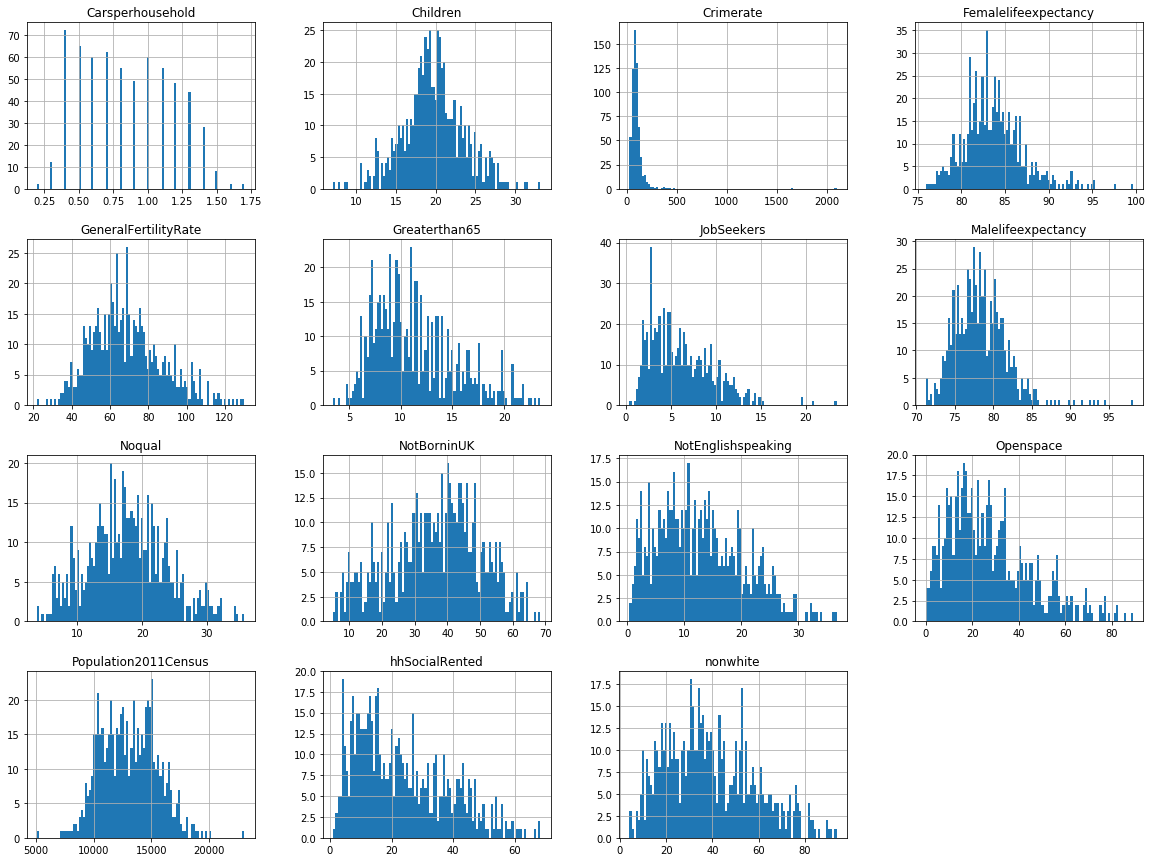

In [0]:
df_ward.hist(bins=100, figsize=(20,15))
plt.show()

## Looking for attribute reationships/correlations

### Pearson's correlation
- Correlation is a statistic that aims to quantify how strong are two attributes/variables related.
- In order to check correlations among attributes (especially life expectancy for male and female), we will compute the Pearson's correlation which sumarizes the strength of the linear relatioships between variables (possible values between -1 and +1 and dimensionless).
- Works well for roughly normal variables whose relationship is linear

In [0]:
# Pearson's correlation
corr_matrix_pearson = df_ward.corr()
corr_matrix_pearson

,Children,Greaterthan65,nonwhite,NotBorninUK,NotEnglishspeaking,Population2011Census,GeneralFertilityRate,Crimerate,Openspace,hhSocialRented,JobSeekers,Noqual,Carsperhousehold,Malelifeexpectancy,Femalelifeexpectancy
Children,1.000000,-0.135790,0.394032,-0.042910,0.021718,0.256937,0.729523,-0.259233,0.199251,0.208258,0.509231,0.658131,0.155516,-0.317654,-0.267671
Greaterthan65,-0.135790,1.000000,-0.553977,-0.612958,-0.551013,-0.384139,-0.221677,-0.189723,0.355234,-0.565569,-0.570205,0.052365,0.777825,0.356331,0.165949
nonwhite,0.394032,-0.553977,1.000000,0.757658,0.749317,0.414695,0.469221,0.085925,-0.251675,0.315997,0.598057,0.249010,-0.333598,-0.260843,-0.138110
NotBorninUK,-0.042910,-0.612958,0.757658,1.000000,0.948717,0.246059,0.190638,0.246487,-0.369114,0.246219,0.347495,-0.197668,-0.570292,-0.003582,0.094147
NotEnglishspeaking,0.021718,-0.551013,0.749317,0.948717,1.000000,0.248767,0.235249,0.229122,-0.321237,0.204053,0.380388,-0.049702,-0.493351,-0.010260,0.088762
Population2011Census,0.256937,-0.384139,0.414695,0.246059,0.248767,1.000000,0.251777,0.004286,-0.101071,0.185861,0.406046,0.136436,-0.225275,-0.359722,-0.254155
GeneralFertilityRate,0.729523,-0.221677,0.469221,0.190638,0.235249,0.251777,1.000000,-0.131509,0.078134,0.051133,0.400892,0.434406,0.054503,-0.220021,-0.179384
Crimerate,-0.259233,-0.189723,0.085925,0.246487,0.229122,0.004286,-0.131509,1.000000,-0.145368,0.164786,0.099661,-0.109991,-0.310355,0.050650,0.129772
Openspace,0.199251,0.355234,-0.251675,-0.369114,-0.321237,-0.101071,0.078134,-0.145368,1.000000,-0.146194,-0.157268,0.186211,0.427985,0.053750,-0.010740
hhSocialRented,0.208258,-0.565569,0.315997,0.246219,0.204053,0.185861,0.051133,0.164786,-0.146194,1.000000,0.733907,0.374347,-0.726136,-0.509351,-0.260567


In [0]:
# Checking the most interesting features for male life expectancy
corr_matrix_pearson["Malelifeexpectancy"].sort_values(ascending=False)

Malelifeexpectancy      1.000000
Femalelifeexpectancy    0.614157
Greaterthan65           0.356331
Carsperhousehold        0.328999
Openspace               0.053750
Crimerate               0.050650
NotBorninUK            -0.003582
NotEnglishspeaking     -0.010260
GeneralFertilityRate   -0.220021
nonwhite               -0.260843
Children               -0.317654
Population2011Census   -0.359722
Noqual                 -0.411873
hhSocialRented         -0.509351
JobSeekers             -0.533290
Name: Malelifeexpectancy, dtype: float64

- For Malelifeexpectancy, the correlation matrix shows that:
 - Femalelifeexpectancy, Greaterthan65 have a (relatively) strong positive correlation with Malelifeexpectancy (variables change in the same direction)
 - JobSeekers, hhSocialRented, Noqual have a (relatively) strong negative correlation with Malelifeexpectancy (variables change in the opposite  direction)
 
- **The features showing strong positive/negative Pearson's correlation are the ones that are most informative in the dataset**
- Please note that a near-zero coefficient means that there is no **linear** relationship/correlation, although non-linear correlation may exist between variables. For instance and for Malelifeexpectancy, Crimerate Pearson's coefficient is almost zero (0.050650), while the corresponding Spearman's coefficient is -0.392455 (see later for Spearman's coefficient computation)

In [0]:
# Checking the most interesting features for female life expectancy
corr_matrix_pearson["Femalelifeexpectancy"].sort_values(ascending=False)

Femalelifeexpectancy    1.000000
Malelifeexpectancy      0.614157
Greaterthan65           0.165949
Crimerate               0.129772
Carsperhousehold        0.117380
NotBorninUK             0.094147
NotEnglishspeaking      0.088762
Openspace              -0.010740
nonwhite               -0.138110
GeneralFertilityRate   -0.179384
Population2011Census   -0.254155
hhSocialRented         -0.260567
Children               -0.267671
Noqual                 -0.319765
JobSeekers             -0.322217
Name: Femalelifeexpectancy, dtype: float64

- Similarly, for Femalelifeexpectancy, the correlation matrix shows that:
 - Malelifeexpectancy has a (relatively) strong positive correlation with Femalelifeexpectancy (variables change in the same direction)
 - JobSeekers, Noqual have a (relatively) strong negative correlation with Femalelifeexpectancy (variables change in the opposite direction)

### Spearman's (rank) correlation
- Summarizes non-linear correlations that may not be captured by Pearson's correlation.
- Works better for non-Gaussian distributions
- Can substitute Pearson's correlation (for linear relationships), but will generally lead to lower coefficients
- Values between -1 and 1.

In [0]:
# Spearman's correlation
corr_matrix_spearman = df_ward.corr(method='spearman')
corr_matrix_spearman

,Children,Greaterthan65,nonwhite,NotBorninUK,NotEnglishspeaking,Population2011Census,GeneralFertilityRate,Crimerate,Openspace,hhSocialRented,JobSeekers,Noqual,Carsperhousehold,Malelifeexpectancy,Femalelifeexpectancy
Children,1.000000,-0.103936,0.410245,-0.011868,0.046893,0.239278,0.707972,-0.098547,0.245665,0.188879,0.488359,0.646214,0.180412,-0.255725,-0.207288
Greaterthan65,-0.103936,1.000000,-0.576178,-0.554344,-0.557836,-0.404297,-0.159047,-0.574640,0.307155,-0.612162,-0.618198,0.020449,0.777602,0.469862,0.233466
nonwhite,0.410245,-0.576178,1.000000,0.757722,0.754643,0.434078,0.450319,0.420736,-0.211973,0.387619,0.666946,0.281200,-0.382672,-0.331032,-0.155517
NotBorninUK,-0.011868,-0.554344,0.757722,1.000000,0.967319,0.255095,0.165370,0.527755,-0.344429,0.262701,0.366202,-0.127359,-0.545718,-0.091365,0.073682
NotEnglishspeaking,0.046893,-0.557836,0.754643,0.967319,1.000000,0.260932,0.204254,0.522454,-0.304662,0.285816,0.412833,-0.029209,-0.531454,-0.137337,0.042961
Population2011Census,0.239278,-0.404297,0.434078,0.255095,0.260932,1.000000,0.260739,0.253047,-0.069624,0.227557,0.447261,0.140912,-0.220430,-0.376013,-0.259595
GeneralFertilityRate,0.707972,-0.159047,0.450319,0.165370,0.204254,0.260739,1.000000,0.024646,0.116526,0.063301,0.390671,0.434383,0.104027,-0.186393,-0.148141
Crimerate,-0.098547,-0.574640,0.420736,0.527755,0.522454,0.253047,0.024646,1.000000,-0.258436,0.544105,0.495171,-0.001224,-0.678021,-0.392455,-0.181910
Openspace,0.245665,0.307155,-0.211973,-0.344429,-0.304662,-0.069624,0.116526,-0.258436,1.000000,-0.107127,-0.131331,0.205808,0.422681,0.092033,0.007425
hhSocialRented,0.188879,-0.612162,0.387619,0.262701,0.285816,0.227557,0.063301,0.544105,-0.107127,1.000000,0.761083,0.351813,-0.745889,-0.626526,-0.333416


In [0]:
# Checking the most interesting features for male life expectancy
corr_matrix_spearman["Malelifeexpectancy"].sort_values(ascending=False)

Malelifeexpectancy      1.000000
Femalelifeexpectancy    0.603908
Greaterthan65           0.469862
Carsperhousehold        0.446913
Openspace               0.092033
NotBorninUK            -0.091365
NotEnglishspeaking     -0.137337
GeneralFertilityRate   -0.186393
Children               -0.255725
nonwhite               -0.331032
Population2011Census   -0.376013
Noqual                 -0.390333
Crimerate              -0.392455
hhSocialRented         -0.626526
JobSeekers             -0.629075
Name: Malelifeexpectancy, dtype: float64

- For Malelifeexpectancy, Spearman's correlation matrix shows that:
 - Femalelifeexpectancy, Greaterthan65 and Carsperhousehold have a (relatively) strong positive correlation with Malelifeexpectancy (variables change in the same direction)
 - JobSeekers, hhSocialRented, Crimerate, Noqual have a (relatively) strong negative correlation with Malelifeexpectancy (variables change in the opposite  direction)
 
- **The features showing strong positive/negative Spearman's correlation are the ones that are most informative in the dataset**

In [0]:
# Checking the most interesting features for female life expectancy
corr_matrix_spearman["Femalelifeexpectancy"].sort_values(ascending=False)

Femalelifeexpectancy    1.000000
Malelifeexpectancy      0.603908
Greaterthan65           0.233466
Carsperhousehold        0.181661
NotBorninUK             0.073682
NotEnglishspeaking      0.042961
Openspace               0.007425
GeneralFertilityRate   -0.148141
nonwhite               -0.155517
Crimerate              -0.181910
Children               -0.207288
Population2011Census   -0.259595
Noqual                 -0.275084
hhSocialRented         -0.333416
JobSeekers             -0.372072
Name: Femalelifeexpectancy, dtype: float64

- Similarly, for Femalelifeexpectancy, Spearman's correlation matrix shows that:
 - Malelifeexpectancy has a (relatively) strong positive correlation with Femalelifeexpectancy (variables change in the same direction)
 - JobSeekers, hhSocialRented have a (relatively) strong negative correlation with Femalelifeexpectancy (variables change in the opposite direction)

- Another way to check for the correlations among attributes is to to use scatter plots

In [0]:
# As there are 15 variables (15^2 plots) for which to check correlations with
# Malelifeexpectancy and Femalelifeexpectancy , we will just plot for the most
# relevant ones (based on Pearson's and Spearman's correlations)
from pandas.plotting import scatter_matrix

attributes_male = ["Malelifeexpectancy", "Femalelifeexpectancy", "Greaterthan65", "Carsperhousehold",
                   "Crimerate", "Noqual", "hhSocialRented", "JobSeekers"]

attributes_female = ["Femalelifeexpectancy", "Malelifeexpectancy", "Greaterthan65", "Crimerate",
                     "Children", "Noqual", "hhSocialRented", "JobSeekers"]

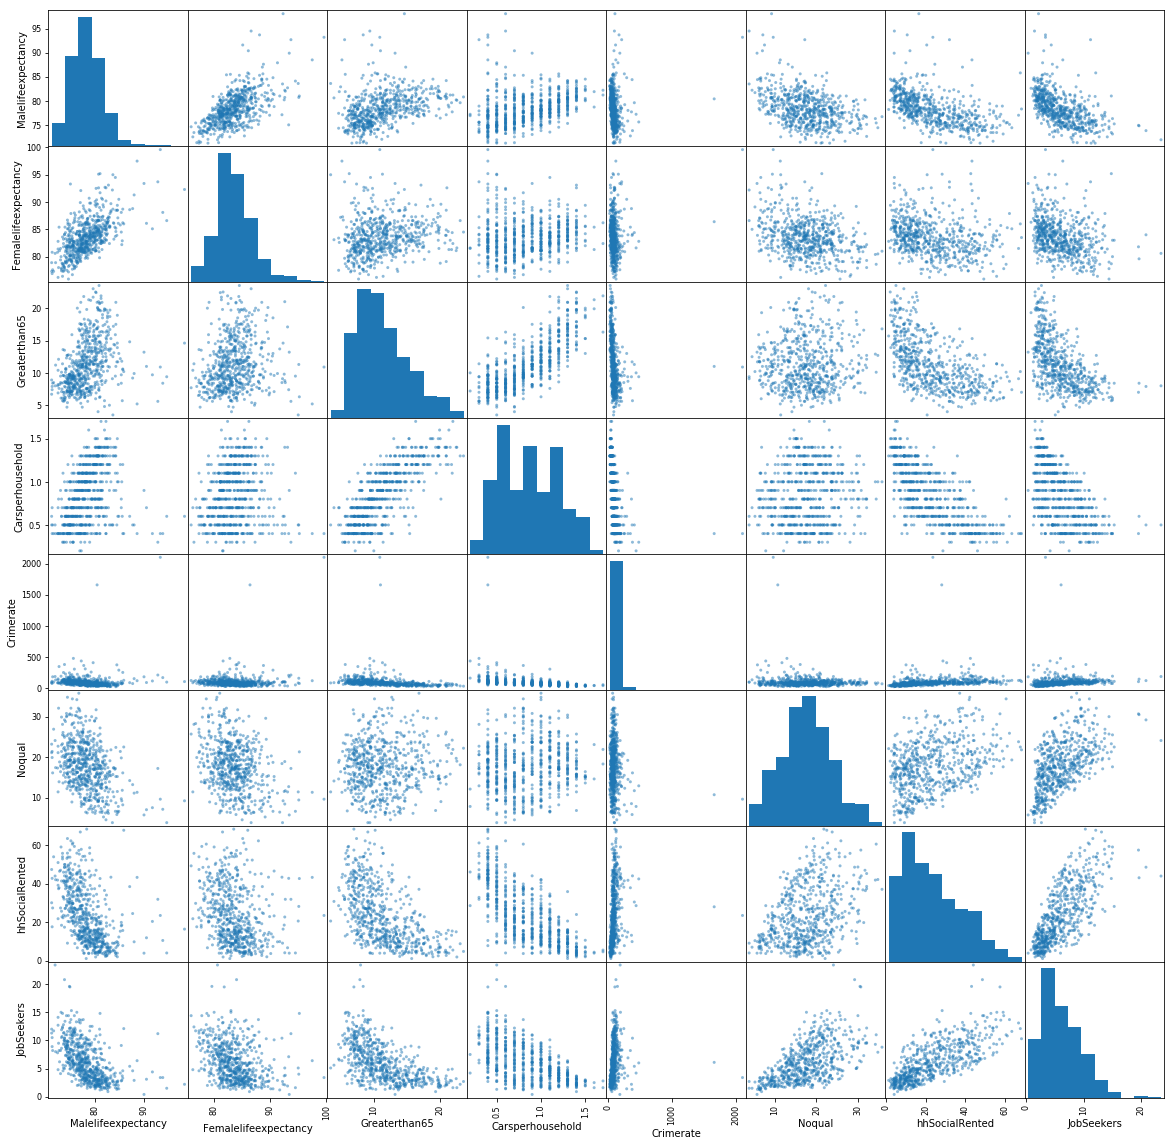

In [0]:
scatter_matrix(df_ward[attributes_male], figsize=(20, 20));

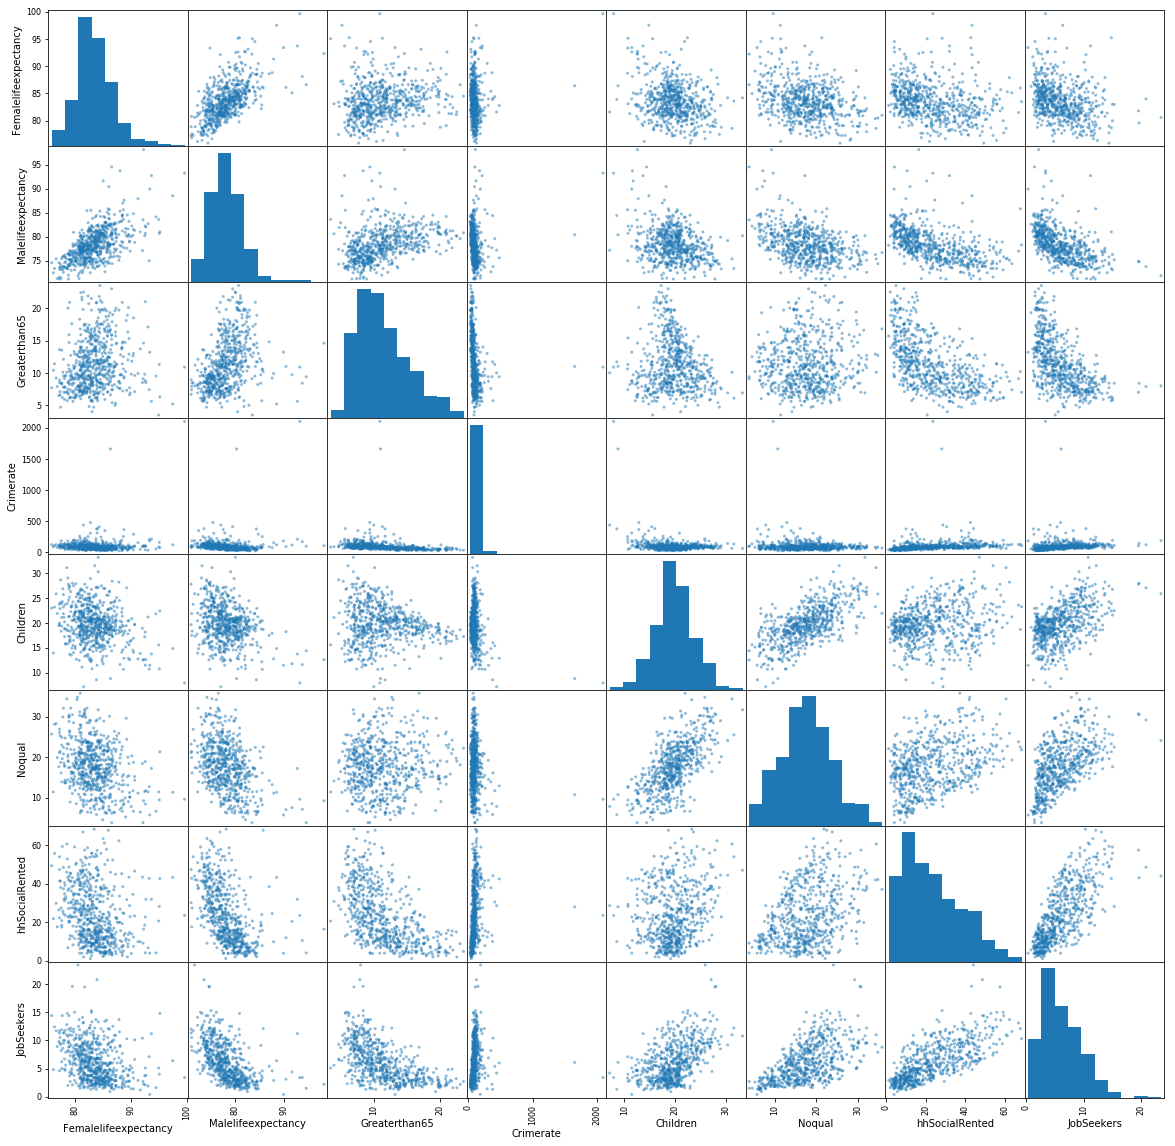

In [0]:
scatter_matrix(df_ward[attributes_female], figsize=(20, 20));

- The scatter plots clearly show the strong and weak relatioships/correlations (not only linear ones) between covariates and health indicators per gender.

The aforementioned statistical and visual analyses suggest that:
- For male health (defined as Malelifeexpectancy), the demographic, environmental and socioeconomic variables that have a relatively strong positive impact are Femalelifeexpectancy, Greaterthan65, Carsperhousehold, while variables that have a relatively strong negative  impact are JobSeekers, hhSocialRented, Crimerate, Noqual (in descending order of impact)

- For female health (defined as Femalelifeexpectancy), the demographic, environmental and socioeconomic variables that have a relatively strong positive impact are Malelifeexpectancy and probably, Greaterthan65, while variables that have a relatively strong negative  impact are JobSeekers, hhSocialRented, Noqual (in descending order of impact)

- **Another option would be to further push the analysis by combining features into new ones and checking the correlation with the health index. This can lead to more informative attributes/features**

- **Some models like Random Forests can evaluate feature importance also.**

- Please note that correlation does not allow to infer causality!

# Task 3: Prediction and Performance Validation/Comparison 
- Build a model to predict life expectancy. Validate your model and compare its performance against a naïve baseline model. Again, use a mix of visual and statistical methods for the performance analysis.

## Feature Cleaning / Pre-Processing
- As there are no missing values in the data (as shown in the next cell), there is no need for an Imputation process.
- If missing values were present, then several strategies may be adopted (data imputation), including: dropping cases (if few) or replacing missing entries, with some sample statistics (mean, mode, median, etc.), or even training a regression to predict such values. This can be used by either pandas utils (dropna(), drop(), fillna()), or scikit-learn SimpleImputer)

- Also, there are no text/categorical features that need to be converted into numeric vectors (using One-Hot Encoding for example). If this was the case, then scikit-learn FeatureUnion and Pipeline API comes handy (or ColumnTransformer). 


In [0]:
# Checking rows with at least a missing attribute value
na_rows = df_ward[df_ward.isnull().any(axis=1)].head()
na_rows

,Wardcode,Wardname,Children,Greaterthan65,nonwhite,NotBorninUK,NotEnglishspeaking,Population2011Census,GeneralFertilityRate,Crimerate,Openspace,hhSocialRented,JobSeekers,Noqual,Carsperhousehold,Malelifeexpectancy,Femalelifeexpectancy


In [0]:
# Some data preparation
# Feature matrix
X = df_ward.drop(["Wardcode", "Wardname", "Malelifeexpectancy", "Femalelifeexpectancy"], axis=1)
# Labels for male and female life expectancy
# ym = np.array(df_ward["Malelifeexpectancy"].copy()).reshape(-1,1)
# yf = np.array(df_ward["Femalelifeexpectancy"].copy()).reshape(-1,1)
ym = df_ward["Malelifeexpectancy"].copy()
yf = df_ward["Femalelifeexpectancy"].copy()

In [0]:
X.head()

,Children,Greaterthan65,nonwhite,NotBorninUK,NotEnglishspeaking,Population2011Census,GeneralFertilityRate,Crimerate,Openspace,hhSocialRented,JobSeekers,Noqual,Carsperhousehold
0,24.440795,5.0,71.9,57.3,25.7,12786.0,103.7,172.5,19.6,26.7,8.7,16.4,0.5
1,26.403467,10.4,29.9,24.7,7.9,10385.0,103.7,93.2,22.4,36.8,10.2,31.2,0.8
2,25.439584,9.5,41.2,30.1,10.5,11545.0,67.4,91.7,3.0,29.4,10.2,28.0,0.9
3,24.508532,15.6,37.9,24.8,6.5,10021.0,76.7,100.4,56.4,32.0,9.0,29.1,0.9
4,21.245003,14.7,24.8,19.0,4.5,10506.0,65.9,72.4,51.1,20.0,8.8,29.9,1.1


In [0]:
X.dtypes # All numeric attributes

Children                float64
Greaterthan65           float64
nonwhite                float64
NotBorninUK             float64
NotEnglishspeaking      float64
Population2011Census    float64
GeneralFertilityRate    float64
Crimerate               float64
Openspace               float64
hhSocialRented          float64
JobSeekers              float64
Noqual                  float64
Carsperhousehold        float64
dtype: object

## Feature Scaling
- Except few algorithms, ML algorithms either do not perform well on non-scaled features (e.g., SVMs, Regression, NN) or take longer to train
- NN often expect  feature values between 0 and 1, so a min-max scaling (normalization) is preferred.

- For other algorithms, standardization (zero normal and unit variance) is suitable

- **Feture scaling will be included in a scikit-learn transformation pipeline (see later)** 

## Model evaluation strategy
- K-fold cross-validation strategy is adopted for model evaluation (instead of a simple train/test split)

- Since the dataset set is small, a simple randomized train/test split will not allow to obtain a reliable estimate of the model's performance. So cross-validation will be used. Also, for the same reason (size of the datatset), test set will be omitted and the train/held-out cross-validation folds will give a good estimate of the model performance

- The performance metric for this task is the Root Mean Square Error RMSE, which measures the standard deviation of the model errors and has the same unit of measure as the predicted variable. Other possible performance measures include the Mean Absolute Error (MAE) which is preferred in the presence of outliers


## Model selection and training
- This is a regression problem (life expectancy prediction)
- A baseline naive model is defined and trained using cross-validation
- Another (better) model is trained, validated, and its performance compared with the baseline model

In [0]:
# imports
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import joblib

- In the following models, feature scaling is defined as a transformer in all the following pipelines/models.

- When making predictions, the models/pipelines will automatically and adequately transform the test or validation data in a seamless way, using the estimated parameters on the training set (e.g., scale_ and mean_ for the StandardScaler transformer) before actually making the predicions.

- This strategy avoids errors resulting from not transforming unseen data before making predictions.

- It also allows to quickly experiment with different feature scaling strategies withough changing the training/prediction code.

In [0]:
# Defining the baseline model/pipeline
# An Epsilon-Support Vector Regression with rbf kernel (regularized).

# Defining our model
# A RandomForestRegressor

# For reproducibility
random_state = 42

rf_pipe =  Pipeline([
            ("std_scaler", StandardScaler()),
            # n_estimators=10 aims to suppress the warning about the deprecated default value in Scikit-Learn 0.22.
            ("rf", RandomForestRegressor(random_state=random_state, n_estimators=10)),  
        ])

svm_pipe = Pipeline([
            ("std_scaler", StandardScaler()),
            ("svm", SVR(kernel="rbf")),
        ])


# One can seamlessly define other pipeline relying on other algorithms 

- Evaluating the baseline model

In [0]:
from sklearn.model_selection import cross_val_score

def evaluate_cv_score(estimator, X, y, cv = 10):
  '''
  Performs cross validation of estimator and return RMSE scores
  '''
  scores = cross_val_score(estimator, X, y, scoring="neg_mean_squared_error", cv=cv)
  rmse_scores = np.sqrt(-scores)
  return rmse_scores


def print_scores(scores):
  '''
  Prints the scores returned from evaluate_cv_score
  '''
  # print("Scores:", scores)
  # print("Mean:", scores.mean())
  # print("Standard deviation:", scores.std())
  print('RMSE +/- STD ', scores.mean(), ' +/- ', scores.std())

  
  

In [0]:
print('The baseline score for male life expectancy is: ')
print_scores(evaluate_cv_score(svm_pipe, X, ym))
print('The baseline score for female life expectancy is: ')
print_scores(evaluate_cv_score(svm_pipe, X, yf))

The baseline score for male life expectancy is: 
RMSE +/- STD  2.5582849585924654  +/-  0.8343007085712126
The baseline score for female life expectancy is: 
RMSE +/- STD  3.0814030589422394  +/-  0.6715032414592139


In [0]:
print('The model score for male life expectancy is: ')
print_scores(evaluate_cv_score(rf_pipe, X, ym))
print('The model score for female life expectancy is: ')
print_scores(evaluate_cv_score(rf_pipe, X, yf))

The model score for male life expectancy is: 
RMSE +/- STD  2.6356498949109968  +/-  0.6795651941983466
The model score for female life expectancy is: 
RMSE +/- STD  3.2165672022835343  +/-  0.5681374880601442


- It can be seen from the aforementioned scores that the baseline has a lower RMSE than our model, which will be fine-tuned next

## Fine tuning the model
- The following code allows to fine-tune the model hyper-parameters using either a greedy search or a randomized search.
- **The advantage of the randomized search is the control over the computing resources (number of iterations) which makes it the favourite method that is used for fine tuning in the next steps**

In [0]:
def fine_tune(estimator, X, y, hparams, strategy='grid', cv = 10, niter = 10,
             random_state=42):
  '''
  Performs a hyper-parameter optimization from a pre-defined list of hparams
  Returns the search object that can be queried for the best estimator,
  parameters, the best score, etc.
  strategy can be 'grid' for a greedy grid search or 'random' for a randomized
  search
  niter controls the randomized search max iterations
  '''
    
  if strategy == 'grid':
    search = GridSearchCV(estimator, hparams, cv=cv,
                          scoring='neg_mean_squared_error',
                        return_train_score=True, n_jobs=-1)
  elif strategy == 'random':
    search = RandomizedSearchCV(estimator, param_distributions=hparams,
                                n_iter=niter, cv=cv, scoring='neg_mean_squared_error',
                                random_state=random_state, return_train_score=True,
                                n_jobs=-1)
  else:
    return None
  
  search.fit(X, y)
  return search


def print_best_hyper_params(search, show_estimator=False):
  '''
  Prints the best hyper-parameters
  '''
  print('Best hyper-parameters: ', search.best_params_)
  print('Best index: ', search.best_index_)
  print('Best RMSE: ', np.sqrt(-search.best_score_))
  if show_estimator:
    print('Best estimator:\n', search.best_estimator_)

    
def print_search_scores(search):
  '''
  Prints the score of each hyper-parameter combination tested during the search
  '''
  cv_res = search.cv_results_
  print("Mean Train Score \t Mean Test Score \t HyperParams")
  for m_train_s, m_test_s, params in zip(cv_res["mean_train_score"],
                                         cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-m_train_s), np.sqrt(-m_test_s), params, sep='\t')
    # mean_train_score', std_train_score, mean_test_score, std_test_score, rank_test_score


- Fine tuning for male life expectancy





In [0]:
param_distribs = {
    'rf__n_estimators': randint(30, 100),
    'rf__max_depth': [3, 5, 10, None],
    'rf__max_features': randint(1, X.shape[1]),
    'rf__min_samples_split': randint(2, 11),
}

rnd_search_m = fine_tune(rf_pipe, X, ym, param_distribs, strategy = 'random', cv=10, niter=50, random_state=random_state)
print('For male life expectancy: ')
print_best_hyper_params(rnd_search_m)
# print_search_scores(rnd_search_m)

For male life expectancy: 
Best hyper-parameters:  {'rf__max_depth': 10, 'rf__max_features': 5, 'rf__min_samples_split': 10, 'rf__n_estimators': 68}
Best index:  8
Best RMSE:  2.548982079967504


- Fine tuning for female life expectancy

In [0]:
rnd_search_f = fine_tune(rf_pipe, X, yf, param_distribs, strategy = 'random', cv=10, niter=50, random_state=random_state)
print('For female life expectancy: ')
print_best_hyper_params(rnd_search_f)
# print_search_scores(rnd_search_f)

For female life expectancy: 
Best hyper-parameters:  {'rf__max_depth': None, 'rf__max_features': 1, 'rf__min_samples_split': 9, 'rf__n_estimators': 92}
Best index:  20
Best RMSE:  3.077007525810654


- After fine tuning, the model slightly outperforms the baseline for both male and female life expectancy


In [0]:
final_model_m = rnd_search_m.best_estimator_
final_model_f = rnd_search_f.best_estimator_

## Other improvements
- Checking feature importance using a RandomForestRegressor.
- Plotting learning curves
- One can use multi-output NN to leverage a kind of joint-learning for predicting both life expectancies at the same time and also sharing NN parameters
- All hyper-parametera can be included in the fine-tuning strategy (e.g., data preparation steps like feature scaling stretegy, model hyper-parameters, etc.)
- One can use hyperopt for hyperparameter search optimization (with NN)

## Model serialization
- Saving the final (best model on disk) for later usage

In [0]:
joblib.dump(final_model_m, "final_model_m.pkl")
joblib.dump(final_model_f, "final_model_f.pkl")

['final_model_f.pkl']